In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:

# Load fake.csv
df = pd.read_csv("/content/fake.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [10]:
print(df.describe())

                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  


In [11]:
print(df.shape)

(23481, 4)


In [12]:
df1 = pd.read_csv("/content/true.csv")

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [14]:
print("\nUnique Subjects in fake news:")
print(df['subject'].unique())


Unique Subjects in fake news:
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [15]:
print("\nNumber of Fake News Articles by Subject:")
print(df['subject'].value_counts())


Number of Fake News Articles by Subject:
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [16]:
df['text_length'] = df['text'].apply(len)
print("\nDistribution of Text Lengths in Fake News:")
print(df['text_length'].describe())


Distribution of Text Lengths in Fake News:
count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: text_length, dtype: float64


In [17]:
print("\nMissing Values in 'text' column of Fake News:")
print(df['text'].isnull().sum())


Missing Values in 'text' column of Fake News:
0


In [18]:
import plotly.express as px

# Calculate text lengths for both DataFrames
df['text_length'] = df['text'].apply(len)
df1['text_length'] = df1['text'].apply(len)

# Create interactive histogram
fig = px.histogram(df, x='text_length', color_discrete_sequence=['red'], title='Text Length Distribution for Fake News')
fig.add_trace(px.histogram(df1, x='text_length', color_discrete_sequence=['blue'], title='Text Length Distribution for True News').update_traces(opacity=0.7).data[0])
fig.show()

In [19]:
# Combine subjects from both DataFrames
combined_subjects = pd.concat([df['subject'], df1['subject']])

# Create interactive bar chart
fig = px.bar(combined_subjects.value_counts(), x=combined_subjects.value_counts().index, y=combined_subjects.value_counts().values,
             color=combined_subjects.value_counts().index, title='Subject Distribution for Fake and True News')
fig.update_layout(xaxis_title='Subject', yaxis_title='Number of Articles')
fig.show()

In [20]:
# Concatenate 'date' columns from both DataFrames
combined_dates = pd.concat([df['date'], df1['date']])

# Create interactive time series plot
fig = px.histogram(combined_dates, x=combined_dates, nbins=50, color_discrete_sequence=['red'], title='Distribution of News Articles Over Time')
fig.show()

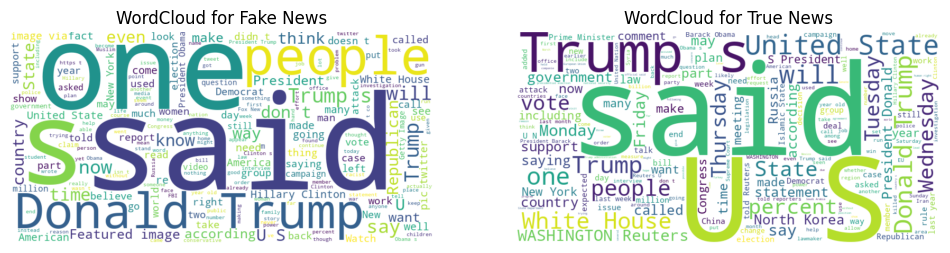

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for fake news
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))

# Generate WordCloud for true news
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['text']))

# Plot WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('WordCloud for True News')
plt.axis('off')

plt.show()

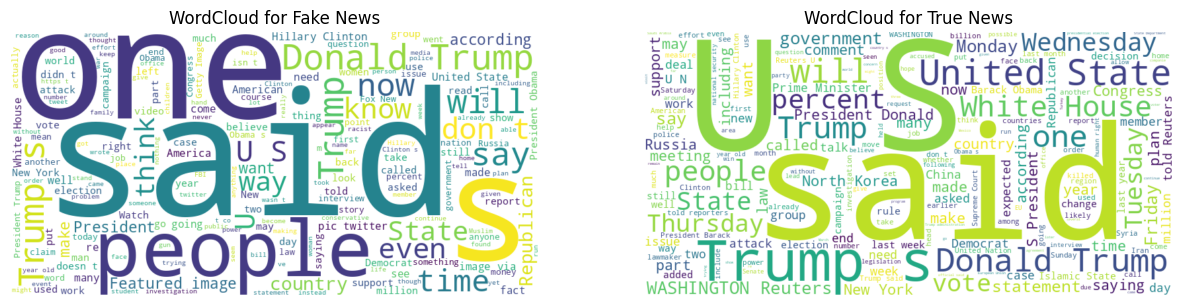

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for fake news
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))

# Generate WordCloud for true news
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['text']))

# Plot side-by-side WordClouds
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(fake_wordcloud, interpolation='bilinear')
ax[0].set_title('WordCloud for Fake News')
ax[0].axis('off')

ax[1].imshow(true_wordcloud, interpolation='bilinear')
ax[1].set_title('WordCloud for True News')
ax[1].axis('off')

plt.show()


In [23]:
# Calculate title lengths for both DataFrames
df['title_length'] = df['title'].apply(len)
df1['title_length'] = df1['title'].apply(len)

# Create interactive histogram for title lengths
fig = px.histogram(df, x='title_length', color_discrete_sequence=['red'], title='Title Length Distribution for Fake News')
fig.add_trace(px.histogram(df1, x='title_length', color_discrete_sequence=['blue'], title='Title Length Distribution for True News').update_traces(opacity=0.7).data[0])
fig.show()

In [24]:
# Create interactive box plot for text lengths
fig = px.box(df, y='text_length', color_discrete_sequence=['red'], title='Box Plot of Text Lengths for Fake News')
fig.add_trace(px.box(df1, y='text_length', color_discrete_sequence=['blue'], title='Box Plot of Text Lengths for True News').update_traces(opacity=0.7).data[0])
fig.show()

In [25]:
# Create interactive sunburst chart for subjects
fig = px.sunburst(df, path=['subject'], title='Sunburst Chart of Subjects for Fake News')
fig.add_trace(px.sunburst(df1, path=['subject'], title='Sunburst Chart of Subjects for True News').data[0])
fig.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Function to plot word frequencies
def plot_word_frequencies(data, title):
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1

    fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Top Words - {title}'])

    # Bar plot for word frequencies
    bar_trace = go.Bar(x=word_counts, y=words, orientation='h', marker=dict(color='rgba(50, 171, 96, 0.6)'))
    fig.add_trace(bar_trace, row=1, col=1)

    fig.update_layout(showlegend=False)
    fig.show()

# Plot word frequencies for fake news
plot_word_frequencies(df['text'], 'Fake News')

# Plot word frequencies for true news
plot_word_frequencies(df1['text'], 'True News')

In [27]:
import plotly.express as px

# Combine 'date' columns from both DataFrames
combined_dates = pd.concat([df['date'], df1['date']])

# Create line chart for news articles over time
fig = px.line(combined_dates.value_counts().sort_index(), title='Temporal Patterns of News Articles Over Time',
              labels={'value': 'Number of Articles', 'index': 'Date'}, line_shape='linear')
fig.show()

In [28]:
# Create scatter plot for title vs. text lengths
fig = make_subplots(rows=1, cols=2, subplot_titles=['Fake News', 'True News'])

# Scatter plot for fake news
scatter_fake = go.Scatter(x=df['title_length'], y=df['text_length'], mode='markers', marker=dict(color='red'), name='Fake News')
fig.add_trace(scatter_fake, row=1, col=1)

# Scatter plot for true news
scatter_true = go.Scatter(x=df1['title_length'], y=df1['text_length'], mode='markers', marker=dict(color='blue'), name='True News')
fig.add_trace(scatter_true, row=1, col=2)

fig.update_layout(title_text='Correlation Between Title and Text Lengths', showlegend=True)
fig.show()